### Problem Statement
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
1.	They first identify a set of employees based on recommendations/ past performance
2.	Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3.	At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve



In [2]:
df_train = pd.read_csv('train_LZdllcl.csv', index_col = 0)
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# looking at info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [4]:
df_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

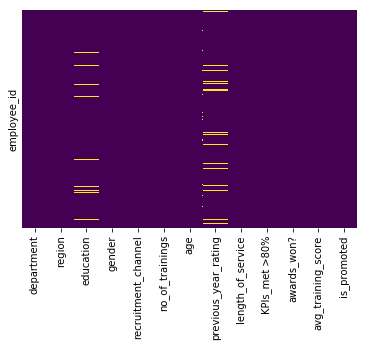

In [6]:
#cbar removes the legend colormap (default : True)
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [7]:
df_train.groupby('department')['education'].value_counts()

department         education       
Analytics          Bachelor's           3978
                   Master's & above     1037
Finance            Bachelor's           1895
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1525
                   Master's & above      733
                   Below Secondary       128
Legal              Bachelor's            814
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           7781
                   Master's & above     3165
                   Below Secondary       176
Procurement        Bachelor's           4393
                   Master's & above     2544
                   Below Secondary       129
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11099
                   Master's & above     4166
Technology         

In [8]:
df_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [9]:
df_train['previous_year_rating'].fillna(value = 0, inplace = True)

In [10]:
df_train['education'].fillna(value = "New", inplace = True)

In [11]:
df_train.groupby('education').size()

education
Bachelor's          36669
Below Secondary       805
Master's & above    14925
New                  2409
dtype: int64

In [12]:
df_train[df_train['education'] == "Master's & above"]['age'].mean()

39.352629815745395

In [13]:
df_train[df_train['education'] == "Bachelor's"]['age'].mean()

33.445226212877365

In [14]:
df_train[df_train['education'] == "Below Secondary"]['age'].mean()

23.836024844720498

In [15]:
df_train[df_train['education'] == "New"]['age'].mean()

30.96886674968867

In [16]:
df_train[df_train['education'] == "New"]['department'].value_counts()

Sales & Marketing    1575
Analytics             337
Operations            226
Technology             99
Procurement            72
Finance                36
HR                     32
R&D                    28
Legal                   4
Name: department, dtype: int64

New is changes to Bachelor's as it has the maximum occurence

In [17]:
df_train['education'] = df_train['education'].map({"New" : "Bachelor's", 
                                       "Bachelor's" : "Bachelor's", 
                                       "Master's & above" : "Master's & above",
                                       "Below Secondary" : "Below Secondary"
                                      })

In [18]:
df_train.groupby('department')['education'].value_counts()

department         education       
Analytics          Bachelor's           4315
                   Master's & above     1037
Finance            Bachelor's           1931
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1557
                   Master's & above      733
                   Below Secondary       128
Legal              Bachelor's            818
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           8007
                   Master's & above     3165
                   Below Secondary       176
Procurement        Bachelor's           4465
                   Master's & above     2544
                   Below Secondary       129
R&D                Bachelor's            570
                   Master's & above      429
Sales & Marketing  Bachelor's          12674
                   Master's & above     4166
Technology         

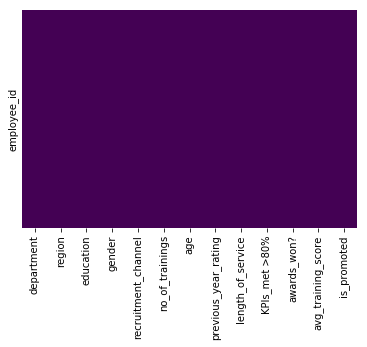

In [19]:
#cbar removes the legend colormap (default : True)
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

# now no null value so whole plot will be in same color

In [20]:
df_train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [21]:
# Out of 54808, only 4668 are recommended for promotion, ie. only 8.5%
print(4668/54808 * 100)

8.517004816815064


### Visualization

In [22]:
#sns.pairplot(df_train)

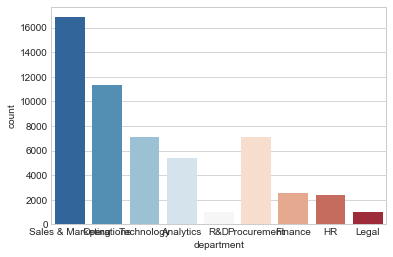

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='department',data=df_train,palette='RdBu_r')

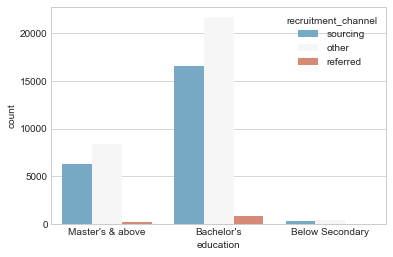

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='education',data=df_train,palette='RdBu_r', hue = "recruitment_channel")

C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


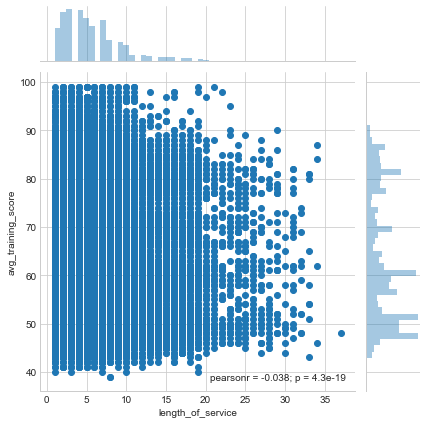

In [25]:
sns.jointplot(x = "length_of_service", y = "avg_training_score", data = df_train)

With increase in service areas, people tend to loose the motivation to get promotion and hence achive less score. But the youngsters thrive to get promotion and hence performs well.

C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


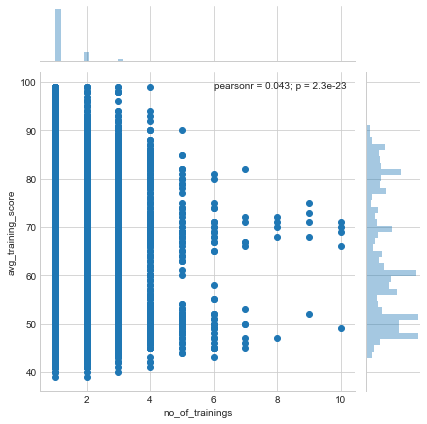

In [26]:
sns.jointplot(x = "no_of_trainings", y = "avg_training_score", data = df_train)

C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


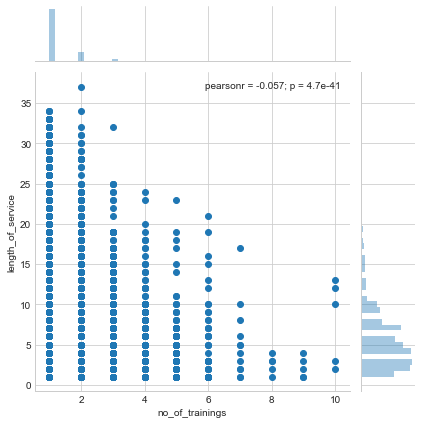

In [27]:
sns.jointplot(x = "no_of_trainings", y = "length_of_service", data = df_train)

Using jointplots to check the average_score attained by employees in their service period and age

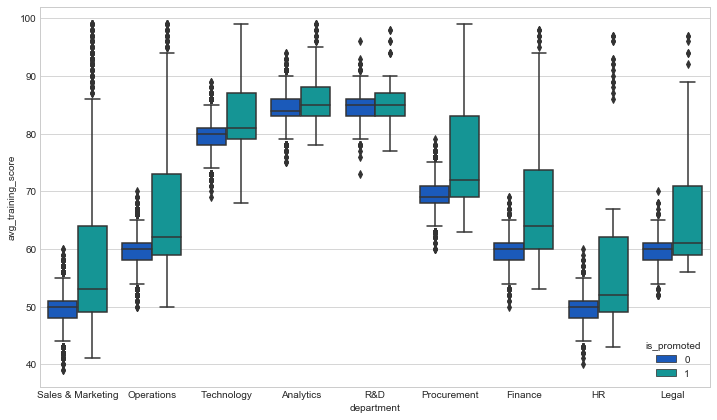

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='department',y='avg_training_score',data=df_train,palette='winter', hue="is_promoted")

Maximum training score is achived by employees in departments ['Analytics', 'R&D', 'Technology'] 

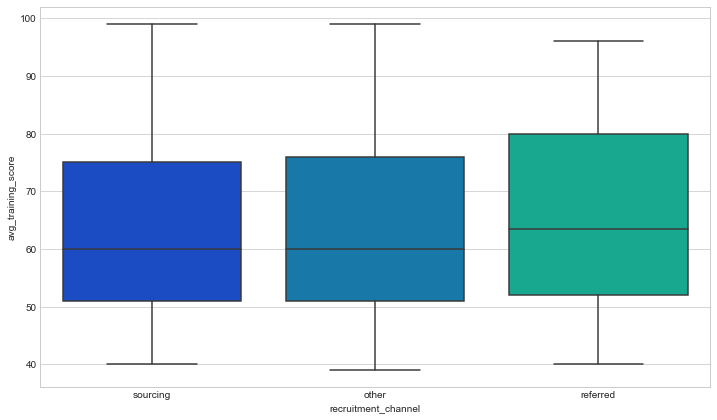

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='recruitment_channel',y='avg_training_score',data=df_train,palette='winter')

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.


In [30]:
dept = pd.get_dummies(df_train['department'],drop_first=True, prefix="department")
edu = pd.get_dummies(df_train['education'],drop_first=True, prefix="education")
male = pd.get_dummies(df_train['gender'],drop_first=True, prefix="gender")
recruit = pd.get_dummies(df_train['recruitment_channel'],drop_first=True, prefix="recruitment_channel")
yr_rating = pd.get_dummies(df_train['previous_year_rating'],drop_first=True, prefix="previous_year_rating")


In [31]:
dept.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
employee_id,,,,,,,,
65438,0,0,0,0,0,0,1,0
65141,0,0,0,1,0,0,0,0
7513,0,0,0,0,0,0,1,0
2542,0,0,0,0,0,0,1,0
48945,0,0,0,0,0,0,0,1


In [32]:
edu.head()

,education_Below Secondary,education_Master's & above
employee_id,,
65438,0,1
65141,0,0
7513,0,0
2542,0,0
48945,0,0


In [33]:
male.head()

,gender_m
employee_id,
65438,0
65141,1
7513,1
2542,1
48945,1


In [34]:
recruit.head()

,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,
65438,0,1
65141,0,0
7513,0,1
2542,0,0
48945,0,0


In [35]:
yr_rating.head()

,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
employee_id,,,,,
65438,0,0,0,0,1
65141,0,0,0,0,1
7513,0,0,1,0,0
2542,1,0,0,0,0
48945,0,0,1,0,0


In [36]:
df_train.drop(["region", "department", "education", "gender", "recruitment_channel", "previous_year_rating"],axis=1,inplace=True)
df_train.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,
65438,1,35,8,1,0,49,0
65141,1,30,4,0,0,60,0
7513,1,34,7,0,0,50,0
2542,2,39,10,0,0,50,0
48945,1,45,2,0,0,73,0


In [37]:
df_train = pd.concat([df_train, dept, edu, male, recruit, yr_rating],axis=1)
df_train.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,1,35,8,1,0,49,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
65141,1,30,4,0,0,60,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7513,1,34,7,0,0,50,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2542,2,39,10,0,0,50,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
48945,1,45,2,0,0,73,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [38]:
df_train.rename(columns = {"department_Sales & Marketing" : "department_Sales&Marketing",
                          "education_Below Secondary" : "education_BelowSecondary",
                          "education_Master's & above" : "education_Master's&above"}, inplace = True)

In [39]:
df_train.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,education_BelowSecondary,education_Master's&above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,1,35,8,1,0,49,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
65141,1,30,4,0,0,60,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7513,1,34,7,0,0,50,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2542,2,39,10,0,0,50,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
48945,1,45,2,0,0,73,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Building a Logistic Regression model

In [40]:
#X_train = df_train.drop("is_promoted", axis = 1)
#y_train = df_train["is_promoted"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('is_promoted',axis=1), df_train['is_promoted'], test_size=0.30,random_state=101)

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

## Evaluation

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     15061
          1       0.86      0.21      0.34      1382

avg / total       0.93      0.93      0.91     16443



In [45]:
cm = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[15015    46]
 [ 1090   292]]


Here 0 means 'no promotion' and 1 means 'promotion'.

Therefore, here we are talking about no promotion as output.

for instance, with 93% accuracy I can say that the person will not get promoted

In [46]:
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

In [47]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9309128504530804

In [48]:
error_rate = (FP + FN) / (TP + TN + FP + FN)
error_rate

0.06908714954691966

In [49]:
recall = (TP) / (TP + FN)
recall

0.9969457539340018

In [50]:
precision = (TP) / (TP + FP)
precision

0.9323191555417573

In [51]:
f_score = (2 * recall * precision) / (recall + precision)
f_score

0.9635500224603736

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = logmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]


In [53]:
# calculate AUC
auc = roc_auc_score(y_test, probs)
auc


0.878284508411572

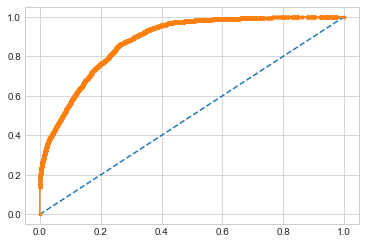

In [54]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')   #plt.plot(x, y)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Evaluationg with different models

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

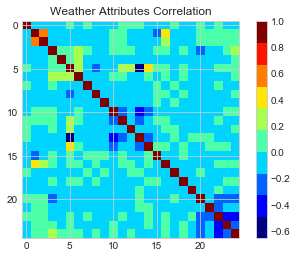

In [56]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 10)      #10 here is number of different colors
cax = ax1.imshow(df_train.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Weather Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
#fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
fig.colorbar(cax)
plt.show()

### Baseline algorithm checking

From the dataset, we will analysis and build a model to predict if precipitation is rain/snow/sunny. This is a binary classification problem, and a few algorithms are appropriate for use. Since we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform. We will use 10 fold cross validation for each testing.

The following non-linear algorithms will be used, namely: Classification and Regression Trees (CART), Linear Support Vector Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).


In [57]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
#models_list.append(('SVM', SVC())) # It is taking 16.5 minutes here, so avoid for now
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [58]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.897146 (0.005239) (run time: 1.795194)
NB: 0.839645 (0.003979) (run time: 0.568378)
KNN: 0.921178 (0.003950) (run time: 6.199125)


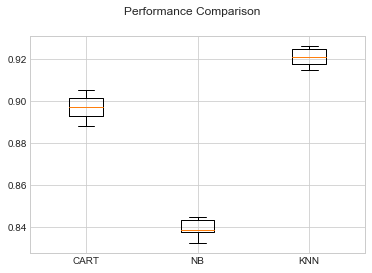

In [59]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the initial run, it looks like CART, KNN and SVM performed the best given the dataset (all above 98% mean accuracy). GuassianNB has also given good erformance here. However, if we standardise the input dataset, it's performance should improve.

## Evaluation of algorithm on Standardised Data

The performance of the few machine learning algorithm could be improved if a standardised dataset is being used. The improvement is likely for all the models. I will use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data

In [60]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())]))) # It is taking 5 minutes here, very less as compared to 76 minutes before
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))  # it takes 2 minutes
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.895842 (0.004142) (run time: 2.205467)
ScaledNB: 0.839645 (0.003979) (run time: 0.874583)
ScaledKNN: 0.917477 (0.004475) (run time: 87.790381)


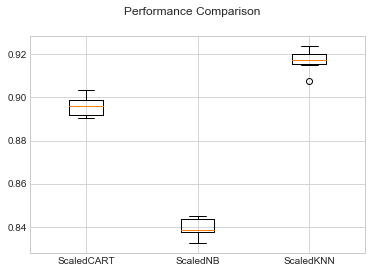

In [61]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Algorithm Tuning - Tuning SVM

We will focus on SVM for the algorithm tuning. We can tune two key parameter of the SVM algorithm - the value of C and the type of kernel. The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF). We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid

In [62]:
#it's going to take 6 hours so be careful.

'''
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
#gamma can also be taken
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
'''

'\nscaler = StandardScaler().fit(X_train)\nrescaledX = scaler.transform(X_train)\nc_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]\n#gamma can also be taken\nkernel_values = [\'linear\', \'poly\', \'rbf\', \'sigmoid\']\nparam_grid = dict(C=c_values, kernel=kernel_values)\nmodel = SVC()\nkfold = KFold(n_splits=num_folds, random_state=21)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=\'accuracy\', cv=kfold)\ngrid_result = grid.fit(rescaledX, y_train)\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

### Application of SVC on dataset

Let's fit the SVM to the dataset and see how it performs given the test data.


In [63]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 39.866511


In [64]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [65]:
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.935535
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     15061
          1       0.95      0.25      0.39      1382

avg / total       0.94      0.94      0.92     16443



In [66]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[15044    17]
 [ 1043   339]]


##  Working on testing dataset_now

In [68]:
df_test = pd.read_csv("test_2umaH9m.csv", index_col = 0)
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [69]:
df_test['education'].fillna(value = "Bachelor's", inplace = True)
df_test['previous_year_rating'].fillna(value = 0, inplace = True)

In [70]:
dept = pd.get_dummies(df_test['department'],drop_first=True, prefix="department")
edu = pd.get_dummies(df_test['education'],drop_first=True, prefix="education")
male = pd.get_dummies(df_test['gender'],drop_first=True, prefix="gender")
recruit = pd.get_dummies(df_test['recruitment_channel'],drop_first=True, prefix="recruitment_channel")
yr_rating = pd.get_dummies(df_test['previous_year_rating'],drop_first=True, prefix="previous_year_rating")

In [71]:
df_test.drop(["region", "department", "education", "gender", "recruitment_channel", "previous_year_rating"],axis=1,inplace=True)
df_test.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,
8724,1,24,1,1,0,77
74430,1,31,5,0,0,51
72255,1,31,4,0,0,47
38562,3,31,9,0,0,65
64486,1,30,7,0,0,61


In [72]:
df_test = pd.concat([df_test, dept, edu, male, recruit, yr_rating],axis=1)
df_test.head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
employee_id,,,,,,,,,,,,,,,,,,,,,
8724,1,24,1,1,0,77,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
74430,1,31,5,0,0,51,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
72255,1,31,4,0,0,47,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
38562,3,31,9,0,0,65,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64486,1,30,7,0,0,61,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [73]:
df_test.shape

(23490, 24)

In [74]:
df_test.rename(columns = {"department_Sales & Marketing" : "department_Sales&Marketing",
                          "education_Below Secondary" : "education_BelowSecondary",
                          "education_Master's & above" : "education_Master's&above"}, inplace = True)

In [75]:
df_train.shape

(54808, 25)

In [76]:
df_train.columns

Index(['no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales&Marketing', 'department_Technology',
       'education_BelowSecondary', 'education_Master's&above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'previous_year_rating_1.0', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0'],
      dtype='object')

In [77]:
df_test.columns

Index(['no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales&Marketing', 'department_Technology',
       'education_BelowSecondary', 'education_Master's&above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'previous_year_rating_1.0', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0'],
      dtype='object')

In [78]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_test_scaled = scaler.transform(df_test)
predictions = model.predict(df_test_scaled)

In [79]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
len(predictions)

23490

In [85]:
predict = pd.DataFrame(predictions, columns=['predictions'])

In [86]:
predict.head()

,predictions
0,0
1,0
2,0
3,0
4,0


In [87]:
predict.to_csv('y_predicted.csv')